In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 17.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 1 - Train and Eval YOLO

In [3]:
model = YOLO("yolov8n.pt")  # n = nhẹ nhất, có thể đổi sang yolov8s.pt, m.pt, l.pt

DATA = '/kaggle/input/fire-detection/FireDetection/data.yaml'
IMAGE_SIZE = 416
EPOCHS = 50
BATCH_SIZE = 16
PROJECT = 'fire_detection'
NAME = 'yolov8_fire'

model.train(
    data=DATA,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    project=PROJECT,
    name=NAME,
    exist_ok=True
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 85.1MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/fire-detection/FireDetection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=fire_detection, name=yolov8_fire, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]
E0000 00:00:1744535704.796818      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744535704.858272      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/fire-detection/FireDetection/train/labels... 6164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6164/6164 [00:15<00:00, 407.93it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/fire-detection/FireDetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/fire-detection/FireDetection/val/labels... 770 images, 0 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:01<00:00, 415.45it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/fire-detection/FireDetection/val is not writeable, cache not saved.
Plotting labels to fire_detection/yolov8_fire/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to fire_detection/yolov8_fire
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.984G      1.741      2.102      1.598          7        416: 100%|██████████| 386/386 [00:40<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.43it/s]


                   all        770       1376      0.397      0.392      0.358      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       1.2G      1.821      1.928      1.648         12        416: 100%|██████████| 386/386 [00:37<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.44it/s]


                   all        770       1376      0.429      0.421      0.372       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.21G      1.817      1.882      1.643          9        416: 100%|██████████| 386/386 [00:36<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.20it/s]


                   all        770       1376      0.378      0.382      0.323      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.21G       1.79       1.82      1.613          9        416: 100%|██████████| 386/386 [00:36<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]


                   all        770       1376      0.539      0.392      0.443      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.21G      1.738      1.775      1.592         10        416: 100%|██████████| 386/386 [00:36<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.48it/s]


                   all        770       1376      0.566      0.467      0.492      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.21G      1.727      1.743      1.579         13        416: 100%|██████████| 386/386 [00:36<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]


                   all        770       1376      0.534      0.498      0.495      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.21G      1.701      1.708      1.554          4        416: 100%|██████████| 386/386 [00:36<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.09it/s]


                   all        770       1376      0.521      0.424      0.455      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.21G      1.683      1.687      1.553         19        416: 100%|██████████| 386/386 [00:36<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]


                   all        770       1376      0.567      0.494      0.514      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.21G      1.673      1.671      1.538          9        416: 100%|██████████| 386/386 [00:36<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.35it/s]


                   all        770       1376       0.55      0.466      0.501      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.21G      1.668      1.642      1.528         15        416: 100%|██████████| 386/386 [00:36<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.54it/s]


                   all        770       1376      0.552      0.473      0.515       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.21G      1.659      1.639      1.529         10        416: 100%|██████████| 386/386 [00:36<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.46it/s]


                   all        770       1376      0.534      0.523      0.507      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.21G      1.648      1.611      1.516         11        416: 100%|██████████| 386/386 [00:36<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.45it/s]


                   all        770       1376      0.542      0.508      0.511      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.21G      1.628      1.599      1.514          5        416: 100%|██████████| 386/386 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.35it/s]


                   all        770       1376      0.559      0.523      0.541      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.21G       1.62      1.589      1.509         11        416: 100%|██████████| 386/386 [00:36<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]

                   all        770       1376      0.566      0.512       0.55       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.21G        1.6      1.585      1.497         18        416: 100%|██████████| 386/386 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.37it/s]


                   all        770       1376      0.569       0.52      0.549      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.21G      1.604      1.569      1.486         10        416: 100%|██████████| 386/386 [00:36<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]


                   all        770       1376       0.59      0.523      0.569      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.21G      1.612      1.579      1.502         18        416: 100%|██████████| 386/386 [00:36<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.33it/s]


                   all        770       1376      0.586      0.504      0.547      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.21G      1.606      1.572      1.497         12        416: 100%|██████████| 386/386 [00:36<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]

                   all        770       1376      0.609      0.517      0.567      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.21G      1.582       1.53      1.474         13        416: 100%|██████████| 386/386 [00:36<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.50it/s]


                   all        770       1376      0.615       0.52       0.57      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.21G       1.59      1.528      1.475          9        416: 100%|██████████| 386/386 [00:36<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.37it/s]


                   all        770       1376      0.635      0.519      0.576      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.21G      1.579      1.526      1.472         14        416: 100%|██████████| 386/386 [00:36<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]


                   all        770       1376      0.588      0.544      0.584      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.21G      1.566      1.504      1.469         15        416: 100%|██████████| 386/386 [00:36<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.30it/s]


                   all        770       1376      0.611      0.523      0.586      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.21G      1.564      1.512      1.471         23        416: 100%|██████████| 386/386 [00:36<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]


                   all        770       1376      0.597      0.536      0.574      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.21G      1.559      1.492      1.467         13        416: 100%|██████████| 386/386 [00:36<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.42it/s]


                   all        770       1376      0.611      0.544      0.597      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.21G      1.552      1.501      1.462         20        416: 100%|██████████| 386/386 [00:36<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]


                   all        770       1376      0.623      0.531      0.585      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.21G      1.559      1.472      1.463          9        416: 100%|██████████| 386/386 [00:36<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.35it/s]


                   all        770       1376      0.595      0.529       0.58      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.21G      1.545      1.484      1.462         18        416: 100%|██████████| 386/386 [00:36<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.50it/s]


                   all        770       1376      0.595      0.517      0.566       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.21G      1.541      1.459       1.45          9        416: 100%|██████████| 386/386 [00:36<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]


                   all        770       1376      0.641      0.531       0.59      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.21G      1.532      1.443      1.449         17        416: 100%|██████████| 386/386 [00:36<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]


                   all        770       1376      0.634      0.548      0.608      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.21G       1.52      1.432      1.453         10        416: 100%|██████████| 386/386 [00:36<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]

                   all        770       1376      0.596      0.554      0.594       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.21G      1.522      1.437      1.447          7        416: 100%|██████████| 386/386 [00:36<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]


                   all        770       1376        0.6      0.568      0.607      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.21G      1.512      1.421      1.442         10        416: 100%|██████████| 386/386 [00:36<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]

                   all        770       1376      0.619      0.552      0.603      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.21G      1.524      1.432      1.446          9        416: 100%|██████████| 386/386 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.38it/s]


                   all        770       1376      0.601      0.568      0.605      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.21G      1.512      1.416      1.444         19        416: 100%|██████████| 386/386 [00:37<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.29it/s]

                   all        770       1376      0.651      0.552      0.622      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.21G        1.5      1.397      1.436          9        416: 100%|██████████| 386/386 [00:37<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.55it/s]

                   all        770       1376        0.6      0.554      0.589      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.21G      1.498       1.39       1.43         10        416: 100%|██████████| 386/386 [00:37<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]

                   all        770       1376      0.636      0.571      0.625       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.21G      1.488      1.396      1.426         18        416: 100%|██████████| 386/386 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]


                   all        770       1376      0.632      0.551      0.616      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.21G      1.486      1.388      1.434         13        416: 100%|██████████| 386/386 [00:36<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.40it/s]


                   all        770       1376      0.658      0.565      0.627      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.21G      1.478      1.372      1.425         12        416: 100%|██████████| 386/386 [00:36<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.54it/s]


                   all        770       1376      0.637      0.562      0.621      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.21G      1.476      1.365      1.412          8        416: 100%|██████████| 386/386 [00:36<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]

                   all        770       1376      0.624      0.579      0.623       0.32


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.21G      1.516      1.319      1.434          6        416: 100%|██████████| 386/386 [00:36<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]


                   all        770       1376      0.648      0.568      0.629      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.21G      1.506      1.285      1.433          6        416: 100%|██████████| 386/386 [00:35<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.23it/s]

                   all        770       1376      0.635      0.572      0.632      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.21G      1.485      1.282      1.423          9        416: 100%|██████████| 386/386 [00:35<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.36it/s]


                   all        770       1376       0.65      0.576      0.637      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.21G      1.477      1.261       1.41          7        416: 100%|██████████| 386/386 [00:35<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]

                   all        770       1376      0.634      0.584      0.632      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.21G      1.469      1.244      1.413          5        416: 100%|██████████| 386/386 [00:35<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.79it/s]

                   all        770       1376      0.642      0.575      0.637      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.21G      1.462      1.239       1.41          8        416: 100%|██████████| 386/386 [00:35<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]

                   all        770       1376      0.652      0.566      0.631      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.21G       1.45      1.222      1.402          8        416: 100%|██████████| 386/386 [00:35<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.48it/s]

                   all        770       1376       0.65      0.579      0.638      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.21G      1.453      1.221      1.401          4        416: 100%|██████████| 386/386 [00:35<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]

                   all        770       1376       0.64      0.587      0.642      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.21G      1.437      1.207      1.394          6        416: 100%|██████████| 386/386 [00:35<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]

                   all        770       1376      0.673       0.56      0.642      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.21G      1.435      1.196       1.39          8        416: 100%|██████████| 386/386 [00:35<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.39it/s]


                   all        770       1376      0.648      0.576      0.645      0.339

50 epochs completed in 0.560 hours.
Optimizer stripped from fire_detection/yolov8_fire/weights/last.pt, 6.2MB
Optimizer stripped from fire_detection/yolov8_fire/weights/best.pt, 6.2MB

Validating fire_detection/yolov8_fire/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  6.09it/s]


                   all        770       1376      0.647      0.578      0.645      0.339


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to fire_detection/yolov8_fire


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e84d1bb5550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Validation
metrics = model.val()

# Test (sử dụng tập test trong YAML)
results = model.predict("/kaggle/input/fire-detection/FireDetection/test/images", conf=0.5)


Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/fire-detection/FireDetection/val/labels... 770 images, 0 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:00<00:00, 1046.08it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fire-detection/FireDetection/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:04<00:00, 10.21it/s]


                   all        770       1376      0.647      0.579      0.646      0.339


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 1.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to fire_detection/yolov8_fire

image 1/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1003-_jpg.rf.6116225c4c52b57ae7dd9b1b6b51c3c8.jpg: 416x416 (no detections), 6.1ms
image 2/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-103-_jpg.rf.79c9c66424ec3d44fd4c6dac5508555d.jpg: 416x416 1 fire, 6.1ms
image 3/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1035-_jpg.rf.74ebc3822b2d69e432b152e5f623f717.jpg: 416x416 2 fires, 6.1ms
image 4/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1051-_jpg.rf.f5229b85dbab00fbc10834c5bb5cdf21.jpg: 416x416 (no detections), 6.0ms
image 5/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1052-_jpg.rf.5985850bc164d7bae02af0d9a77a8b82.jpg: 416x416 2 fires, 5.9ms
image 6/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1053-_jpg.rf.628f689d2ec1aead259d7e9ae10297f2


image 1/1 /kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg: 416x416 1 fire, 8.2ms
Speed: 1.1ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


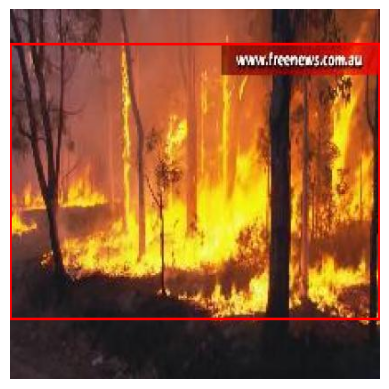

In [7]:
def show_prediction(img_path, model):
    results = model.predict(img_path, conf=0.5)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

IMAGE_PATH = '/kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg'
show_prediction(IMAGE_PATH, model)


In [11]:
df = pd.read_csv("fire_detection/yolov8_fire/results.csv")
df.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

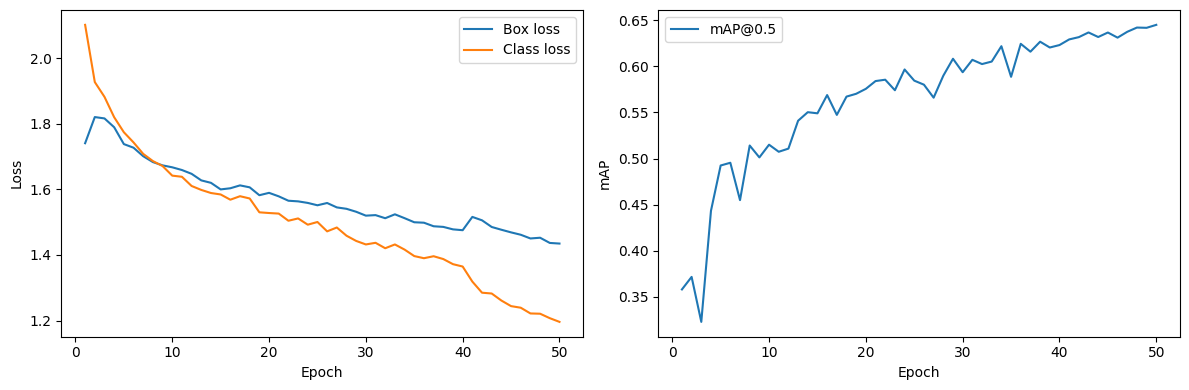

In [12]:
def plot_training_log(log_path):
    df = pd.read_csv(log_path)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['train/box_loss'], label="Box loss")
    plt.plot(df['epoch'], df['train/cls_loss'], label="Class loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@0.5")
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.legend()

    plt.tight_layout()
    plt.show()

# CSV log file nằm trong thư mục runs/train/yolov8_fire/results.csv
plot_training_log("fire_detection/yolov8_fire/results.csv")


In [14]:
def get_prediction(image_path, model, conf=0.5):
    results = model.predict(image_path, conf=conf)
    output = []
    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            conf_score = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            output.append({
                "class_id": cls_id,
                "confidence": conf_score,
                "box": (x1, y1, x2, y2)
            })
    return output

IMAGE_PATH = '/kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg'
pred = get_prediction(IMAGE_PATH, model)
print(pred)


image 1/1 /kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg: 416x416 1 fire, 9.3ms
Speed: 1.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
[{'class_id': 0, 'confidence': 0.6727770566940308, 'box': (0, 39, 415, 348)}]
